# Multi-class Classification with logistic regression 

In this exercise, we will use logistic regression to recognize handwritten digits (from 0 to 9). We will apply one-vs-all classification. 

The dataset contains 5000 training examples of handwritten digits and each example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is represented by a floating point number indicating the grayscale intensity at that location. The 20 by 20 grid of pixels in unrolled into a 400-dimensional vector. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.io import loadmat
import random

In [2]:
from scipy.optimize import fmin_bfgs

## loading and visualinzg data

In [3]:
# load training data
data = loadmat('ex3data1.mat')
X = data['X']
y = data['y']
y = y.reshape(len(y),)
print(X.shape)
print(y.shape)

(5000L, 400L)
(5000L,)


In [4]:
# randomly select 100 data points to display
m = X.shape[0]
rand_indices = range(m)
random.shuffle(rand_indices)
sel = X[rand_indices[0:100],:]

In [5]:
# displayData display 2D data in a nice grid
def displayData(X):
    m = X.shape[0]
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m/display_rows))
    fig, ax = plt.subplots(display_rows, display_cols,figsize=(10, 10))
    for i in range(display_rows):
        for j in range(display_cols):
            num = i*display_cols + j
            image_reshape = sel[num].reshape(20,20).T
            ax[i,j].imshow(image_reshape, cmap = 'gray_r')
            ax[i,j].tick_params(labelbottom=False, labelleft = False)
    plt.show()

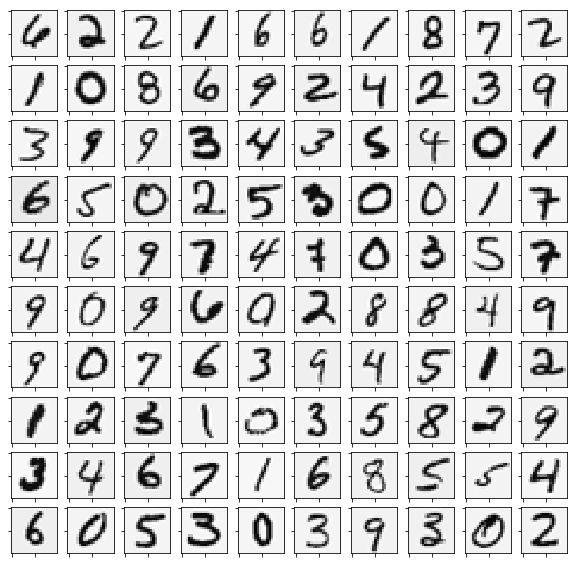

In [6]:
# display randomly selected data
displayData(sel)

## Vectorize Logistic Regression

In [7]:
# compute sigmoid of a variable
def sigmoid(z):
    g = 1./(1.+np.exp(-z))
    return g

In [8]:
# costFunctionReg compute cost and gradient for regularized logistic regression
def costFunctionReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    theta_squared = np.dot(theta[1:].transpose(), theta[1:])
    J = J/float(m) + reg_lambda/(2*float(m)) *(theta_squared)
    grad = np.dot(X.transpose(), h-y)
    grad = grad/float(m)
    grad[1:] = grad[1:] + (reg_lambda/float(m)) * theta[1:]
    return J, grad

In [9]:
# test case for costFunctionReg
theta_t = np.array([-2,-1,1,2])
X_t = np.append(np.ones([5,1]), np.array(range(1,16)).reshape(3,5).T/10.0, 1)
y_t = 1*(np.array([1,0,1,0,1])>=0.5)
lambda_t = 3

In [10]:
# compute cost and gradient of test case
J, grad = costFunctionReg(theta_t, X_t, y_t, lambda_t)
print("Cost: {}".format(J))
print("Gradients: {}".format(grad))

Cost: 2.53481939611
Gradients: [ 0.14656137 -0.54855841  0.72472227  1.39800296]


## One-vs-All Training

In [11]:
# costReg function is the objective function passing to fmin_bfgs and get minimized.
def costReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    J = -np.dot(y.transpose(),np.log(h)) - np.dot((1-y).transpose(), np.log(1-h))
    theta_sqaured = np.dot(theta[1:].transpose(), theta[1:])
    J = J/float(m) + reg_lambda/(2*float(m)) *theta_sqaured
    return J

In [12]:
# gradReg function is the gradient of objective function we'll pass to fmin_bfgs 
def gradReg(theta, X, y, reg_lambda):
    m = len(y)
    h = sigmoid(np.dot(X,theta))
    grad = np.dot(X.transpose(), h-y)
    grad = grad/m
    grad[1:] = grad[1:] + (reg_lambda/float(m)) * theta[1:]
    return grad

In [13]:
# oneVsAll function trains multiple logistic regression classifiers and returns all the classifiers in a matrix all_theta, 
# where the i-th row of all_theta corresponding to the classifier for label i+1
def oneVsAll(X, y, num_labels,reg_lambda, maxiter):
    m = X.shape[0]
    n = X.shape[1]
    all_theta = np.zeros([num_labels, n+1])
    X = np.append(np.ones([m,1]), X, 1)
    for c in range(num_labels):
        initial_theta = np.zeros([n+1,1])
        # run fmin_bfgs to obtain the optimal theta
        print(c+1)
        theta = fmin_bfgs(costReg, initial_theta, fprime=gradReg, args=(X, 1*(y==(c+1)), reg_lambda), maxiter = maxiter)
        all_theta[c,:] = theta
    return all_theta

In [14]:
# train the data
reg_lambda = 0.1
num_labels = 10
all_theta = oneVsAll(X, y, num_labels, reg_lambda, 120)

1
         Current function value: 0.014623
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
2
         Current function value: 0.055594
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
3
         Current function value: 0.062190
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
4
         Current function value: 0.037283
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
5
         Current function value: 0.060196
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
6
         Current function value: 0.021567
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
7
         Current function value: 0.034011
         Iterations: 120
         Function evaluations: 121
         Gradient evaluations: 121
8
         Current function

## Predict for One-Vs-All

In [15]:
# predictOneVsAll function predict the label for a trained one-vs-all classifier. 
def predictOneVsAll(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    X = np.append(np.ones([m,1]), X, 1)
    all_h = sigmoid(np.dot(X, all_theta.T))
    p = np.argmax(all_h, axis=1)+1
    return p

In [16]:
# make predictions on training set
pred = predictOneVsAll(all_theta, X)
print("Training Set Accuracy: {}%".format(100*(pred==y).sum()/float(len(y))))

Training Set Accuracy: 95.16%
